In [88]:
# libraries to import
import numpy as np
import matplotlib.pyplot as plt

In [89]:
# useful functions
def show_bar_plot(x_axis, y_axis, x_label, y_label, title):

    # Create bar chart
    plt.bar(x_axis, y_axis)

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Show the plot
    plt.show()
    
def show_line_plot(x_axis, y_axis, labels, x_label, y_label, title):
    """Plot a line chart with the given x and y values, and labels for the lines."""
    # Create line chart
    for y, label in zip(y_axis, labels):
        plt.plot(x_axis, y, label=label)
        plt.legend(labels)
        
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Show the plot
    plt.show()

# Initial Setup

This will be the witness experiment, with the default parameters in order to have a better comparison scale.

In [97]:
#Initialisation of default general parameters for the Explore then Commit strategy of the Multi-Armed Bandit problem
# in the context of a slot machine

# Total number of arms
N_ARMS = 3

# Exploration phase duration
N_EXPLORATION = 100

# Arms Probabilities repartitions
true_probs = np.random.rand(N_ARMS)
highest_prob_arm = np.argmax(true_probs)

# play limit / initial money
MONEY = 1000

# price of a single play
PRICE = 0.5

# reward for a win
REWARD = 1


# Print all the probabilities and the index of the highest probability
print("Probabilities: ", true_probs)
print("Highest probability arm: ", highest_prob_arm)

Probabilities:  [0.19887657 0.838123   0.72516591]
Highest probability arm:  1


In [103]:
# Algorithm for Explore then Commit strategy
# Define the Explore-then-Commit algorithm
def explore_then_commit(num_arms, exploration, max_throws, price, reward):
    n_pulls = np.zeros(num_arms, dtype=int)
    n_successes = np.zeros(num_arms, dtype=int)
    results = np.zeros((num_arms, max_throws), dtype=int)
    
    # Exploration phase for each arm
    for arm in range(num_arms):
        for i in range(exploration):
            n_pulls[arm] += 1
            x = np.random.rand()
            #print("x: ", x)
            #print("true prob: ", true_probs[arm])
            if x < true_probs[arm]:
                #print("arm: ", arm)
                n_successes[arm] += 1
                reward = 1
            else:
                reward = 0
            results[arm, n_pulls[arm]-1] = reward
    

    # print the number of successes for each arm
    print("Number of successes for each arm in ", exploration, "pulls: ", n_successes)

    # Commit phase
    arm = np.argmax(np.where(n_pulls > 0, n_successes / n_pulls, np.nan))
    for i in range(num_arms * exploration, max_throws):
        n_pulls[arm] += 1
        if np.random.rand() < true_probs[arm]:
            n_successes[arm] += 1
            reward = 1
        else:
            reward = 0
        results[arm, n_pulls[arm]-1] = reward
        
    # print the number of successes for each arm
    print("Number of successes for each arm in ", max_throws, "pulls: ", n_successes)
    
    return results


Number of successes for each arm in  100 pulls:  [22 79 75]
Number of successes for each arm in  1000 pulls:  [ 22 674  75]


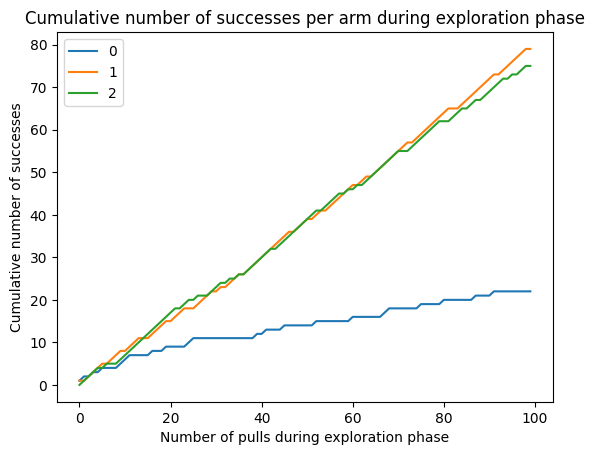

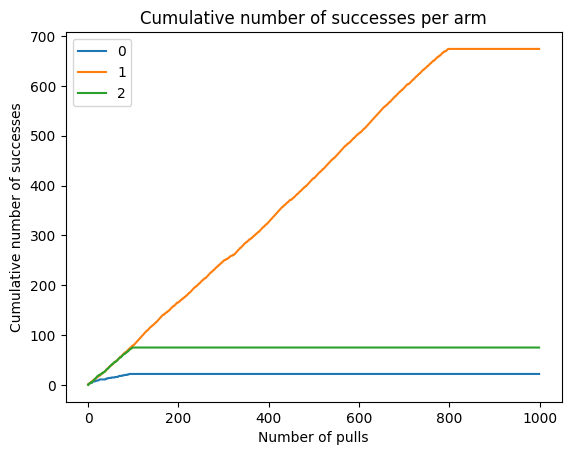

In [104]:
# Display results of the Explore as a graph of the number of successful plays per arm depending on the number of plays
results = explore_then_commit(N_ARMS, N_EXPLORATION, MONEY, PRICE, REWARD)

# Plot the cumulative number of successes per arm during the exploration phase
show_line_plot(
    x_axis=range(N_EXPLORATION),
    y_axis=np.cumsum(results[:, :N_EXPLORATION], axis=1),
    labels=range(N_ARMS),
    x_label="Number of pulls during exploration phase",
    y_label="Cumulative number of successes",
    title="Cumulative number of successes per arm during exploration phase"
)

# Plot the cumulative number of successes per arm during the exploration phase
show_line_plot(
    x_axis=range(MONEY),
    y_axis=np.cumsum(results, axis=1),
    labels=range(N_ARMS),
    x_label="Number of pulls",
    y_label="Cumulative number of successes",
    title="Cumulative number of successes per arm"
)